In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
import yfinance as yf

In [ ]:
df = yf.download('AAPL', start='2012-08-19', end='2023-04-19')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-08-20,23.214643,23.755358,23.210714,23.755358,20.305431,613384800
2012-08-21,23.957857,24.102858,23.226070,23.430714,20.027925,812719600
2012-08-22,23.372143,23.892857,23.146786,23.888214,20.418997,565322800
2012-08-23,23.789642,23.924999,23.612499,23.665358,20.228497,420128800
2012-08-24,23.553928,23.910000,23.412500,23.686428,20.246510,437340400
...,...,...,...,...,...,...
2023-04-12,161.220001,162.059998,159.779999,160.100006,160.100006,50133100
2023-04-13,161.630005,165.800003,161.419998,165.559998,165.559998,68445600
2023-04-14,164.589996,166.320007,163.820007,165.210007,165.210007,49337200


In [ ]:
#Getting the number of rows and columns in the dataset
df.shape

(2682, 6)

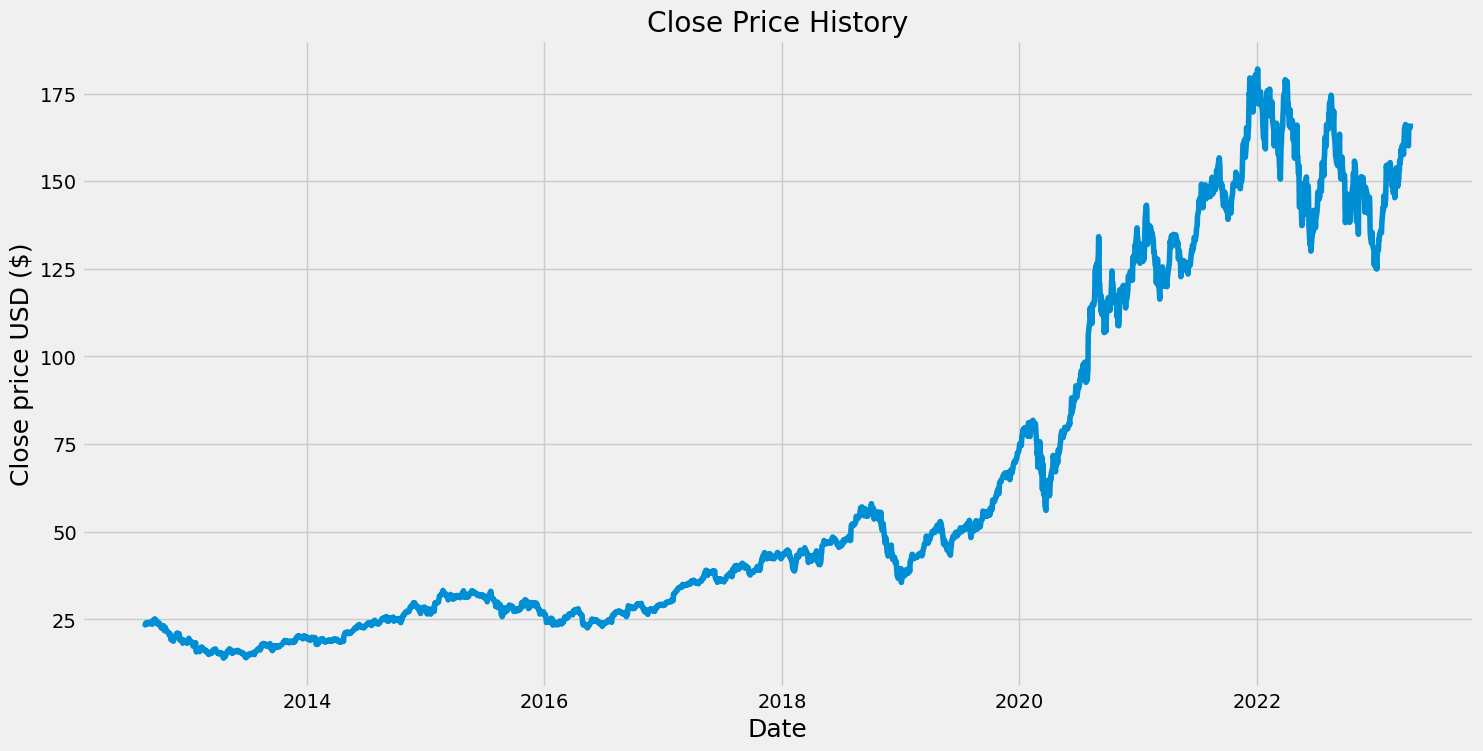

In [ ]:
#Shaping the closing price
plt.figure(figsize = (16,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize =18)
plt.ylabel("Close price USD ($)", fontsize = 18)
plt.show()

In [ ]:
#Getting the closing price info only
data = df.filter(["Close"])

In [ ]:
#Converting the dataframe to an array
dataset = data.values

In [ ]:
#Get the number of rows to train the model on

training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

2146

In [ ]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
# Print the scaled data
print(scaled_data)

[[0.0583584 ]
 [0.05642671]
 [0.05914891]
 ...
 [0.90003726]
 [0.9001562 ]
 [0.90753444]]


In [ ]:
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

In [ ]:
#Spliting the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i <=61:
        print (x_train)
        print (y_train)
        print ()

[array([0.0583584 , 0.05642671, 0.05914891, 0.05782288, 0.05794825,
       0.06059609, 0.06040908, 0.06012644, 0.05808638, 0.05837752,
       0.0604452 , 0.05943793, 0.06072146, 0.06160762, 0.05784626,
       0.05738937, 0.05934441, 0.06214738, 0.06391118, 0.06571748,
       0.06617011, 0.06621049, 0.06548797, 0.06578335, 0.06380704,
       0.06014132, 0.05836477, 0.06179461, 0.05877278, 0.05713436,
       0.05754237, 0.05969717, 0.05870902, 0.05568932, 0.05262498,
       0.05213197, 0.05320725, 0.05048504, 0.05082718, 0.05190034,
       0.0550943 , 0.05399352, 0.05144982, 0.04660469, 0.05174521,
       0.04735271, 0.0480901 , 0.04654093, 0.04536365, 0.0435191 ,
       0.04377836, 0.03958349, 0.04124529, 0.04086914, 0.03558838,
       0.03128513, 0.03326356, 0.03236466, 0.03237954, 0.03110025])]
[0.028707429353137748]

[array([0.0583584 , 0.05642671, 0.05914891, 0.05782288, 0.05794825,
       0.06059609, 0.06040908, 0.06012644, 0.05808638, 0.05837752,
       0.0604452 , 0.05943793, 0.0

In [ ]:
#Convert the X_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
#reshape the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train.shape

(2086, 60, 1)

In [ ]:
#Build the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")


In [ ]:
#train the model
model.fit(x_train, y_train, batch_size=32, epochs=20)


Epoch 1/20
66/66 [==============================] - 10s 79ms/step - loss: 0.0026
Epoch 2/20
66/66 [==============================] - 4s 60ms/step - loss: 2.2159e-04
Epoch 3/20
66/66 [==============================] - 4s 60ms/step - loss: 1.8625e-04
Epoch 4/20
66/66 [==============================] - 5s 79ms/step - loss: 1.8288e-04
Epoch 5/20
66/66 [==============================] - 4s 61ms/step - loss: 1.9360e-04
Epoch 6/20
66/66 [==============================] - 4s 59ms/step - loss: 1.8648e-04
Epoch 7/20
66/66 [==============================] - 5s 79ms/step - loss: 1.8469e-04
Epoch 8/20
66/66 [==============================] - 4s 61ms/step - loss: 1.6533e-04
Epoch 9/20
66/66 [==============================] - 4s 60ms/step - loss: 1.7208e-04
Epoch 10/20
66/66 [==============================] - 7s 108ms/step - loss: 1.5438e-04
Epoch 11/20
66/66 [==============================] - 4s 59ms/step - loss: 1.4762e-04
Epoch 12/20
66/66 [==============================] - 5s 69ms/step - loss: 1.

In [ ]:
#Create the test data set

test_data = scaled_data[training_data_len - 60:, :]


In [ ]:
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
#convert the data to a numpy array
x_test = np.array(x_test)

#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Get the model's predicted price values
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse

17/17 [==============================] - 1s 19ms/step


5.391558971853224

<ipython-input-28-989c294a4d46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


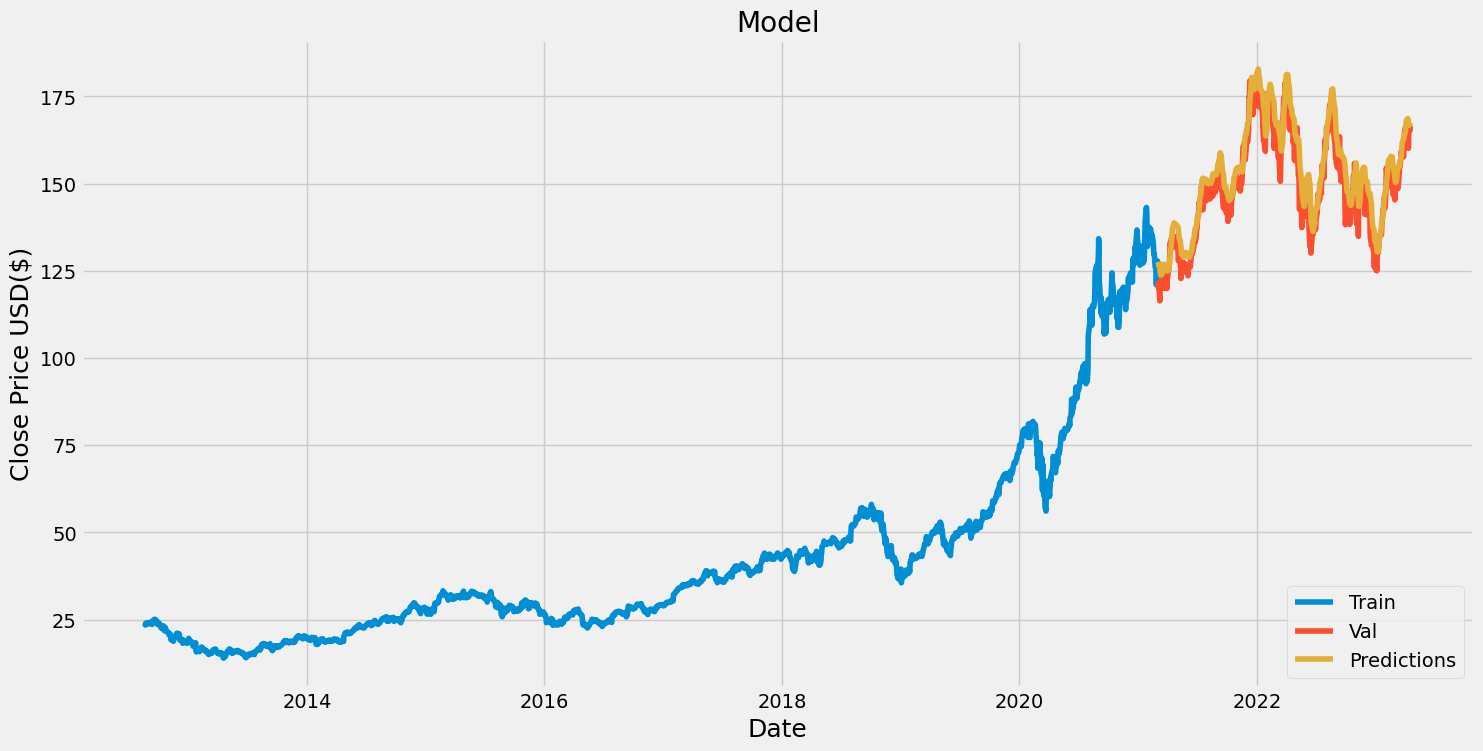

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions
#visualise the data

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price USD($)", fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

In [ ]:

#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-03-03,122.059998,127.556656
2021-03-04,120.129997,127.163528
2021-03-05,121.419998,126.436302
2021-03-08,116.360001,125.876175
2021-03-09,121.089996,124.670013
...,...,...
2023-04-12,160.100006,167.644135
2023-04-13,165.559998,166.695984
2023-04-14,165.210007,166.684967


In [ ]:
#Get the quote
apple_quote = yf.download('AAPL', start='2012-08-19', end='2023-04-19')

#Create a new dataframe
new_df = apple_quote.filter(["Close"])

#Get the last 60 days losing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append the past 60 days
X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

#Convert the X_test data set to a numpy array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 32ms/step
[[167.99904]]


In [ ]:
apple_quote2 = yf.download('AAPL', start='2023-04-20', end='2023-04-20')
print(apple_quote2["Close"])

[*********************100%***********************]  1 of 1 completed
Date
2023-04-19    167.630005
Name: Close, dtype: float64


In [ ]:
# Get the absolute errors between predictions and actual values
abs_errors = np.abs(predictions - y_test)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(abs_errors / y_test) * 100

# Calculate the percentage accuracy
accuracy = 100 - mape

# Print the percentage accuracy
print("Percentage Accuracy: {:.2f}%".format(accuracy))


Percentage Accuracy: 97.05%
